In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [33]:
dataset1 = pd.read_csv('/content/MYDATA.csv')
X = dataset1[['X']].values     # feature
y = dataset1[['Y']].values    # target


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=33
)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [35]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor  = torch.tensor(X_test,  dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test,  dtype=torch.float32).view(-1, 1)

In [36]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        # A simple 2-hidden-layer network
        self.net = nn.Sequential(
            nn.Linear(1, 16),  # Input -> first hidden (16 neurons)
            nn.ReLU(),
            nn.Linear(16, 8),  # first hidden -> second hidden (8 neurons)
            nn.ReLU(),
            nn.Linear(8, 1)    # second hidden -> output (1 neuron)
        )
        self.history = {'loss': []}

    def forward(self, x):
        return self.net(x)

In [37]:
ai_brain  = NeuralNet()
criterion = nn.MSELoss()                   # Regression loss
optimizer = optim.Adam(ai_brain.parameters(), lr=0.01)

In [38]:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(1, epochs + 1):
        optimizer.zero_grad()
        outputs = ai_brain(X_train)
        loss    = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}")

train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [200/2000], Loss: 448.622437
Epoch [400/2000], Loss: 4.131661
Epoch [600/2000], Loss: 0.453311
Epoch [800/2000], Loss: 0.167081
Epoch [1000/2000], Loss: 0.060179
Epoch [1200/2000], Loss: 0.018193
Epoch [1400/2000], Loss: 0.006607
Epoch [1600/2000], Loss: 0.002510
Epoch [1800/2000], Loss: 0.000835
Epoch [2000/2000], Loss: 0.000241


In [39]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f"Test Loss: {test_loss.item():.6f}")

Test Loss: 3.674684


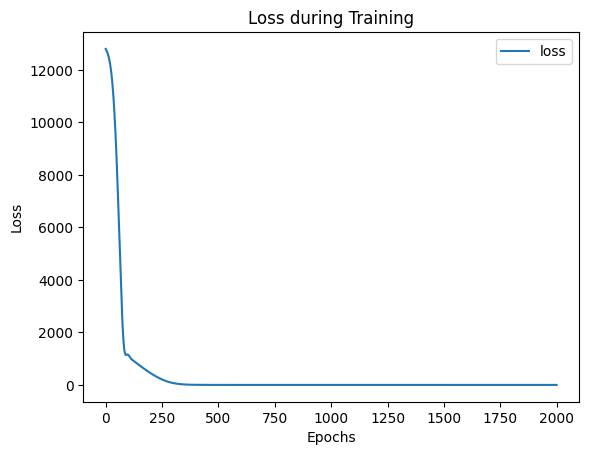

In [40]:
loss_df = pd.DataFrame(ai_brain.history)
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [41]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
scaled_input = torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)
prediction = ai_brain(scaled_input).item()
print(f"Prediction for Input=9: {prediction:.2f}")

Prediction for Input=9: 89.99
